# Tesla & GameStop Stock & Revenue — Full Assignment Notebook
Questions 1–6 (yfinance + robust web scraping + plots)

Q1) tesla_data.head():
Price        Date Adj Close     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.074000  1.333333  1.055333  1.333333  103003500
Q2) tesla_revenue.tail():
    Date  Revenue
11  2013     2013
12  2012      413
13  2011      204
14  2010      117
15  2009      112


C:\Users\adity\AppData\Local\Temp\ipykernel_27796\3307065213.py:44: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Q3) gme_data.head():
Price        Date Adj Close    Close     High      Low     Open    Volume
Ticker                  GME      GME      GME      GME      GME       GME
0      2002-02-13  1.691667  2.51250  2.51500  2.38125  2.40625  76216000
1      2002-02-14  1.683250  2.50000  2.54875  2.48125  2.54375  11021600
2      2002-02-15  1.674834  2.48750  2.50625  2.46250  2.50000   8389600
3      2002-02-19  1.607504  2.38750  2.47500  2.34375  2.47500   7410400
4      2002-02-20  1.662210  2.46875  2.46875  2.38125  2.40000   6892800
Q4) gme_revenue.tail():
    Date  Revenue
12  2013     8887
13  2012     9551
14  2011     9474
15  2010     9078
16  2009     8806
Q5) Tesla closing price chart:


C:\Users\adity\AppData\Local\Temp\ipykernel_27796\3307065213.py:44: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


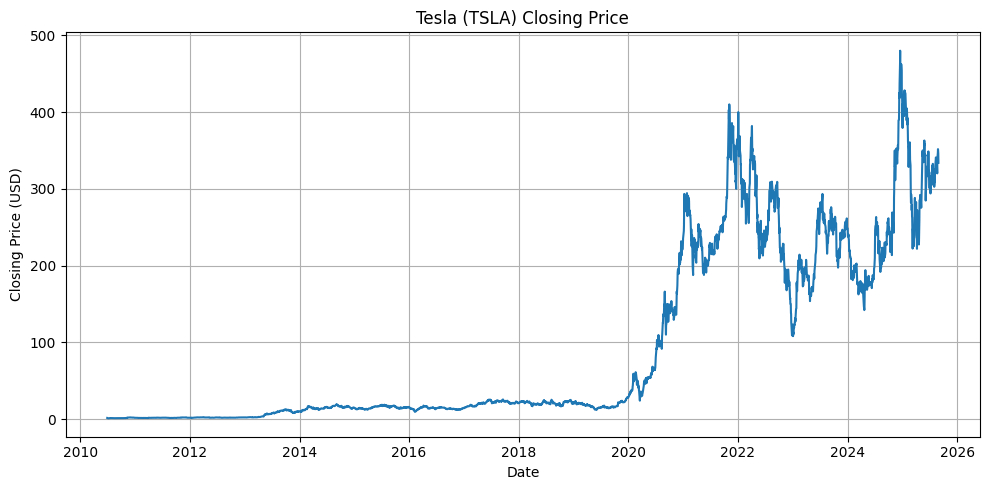

Q6) GameStop closing price chart:


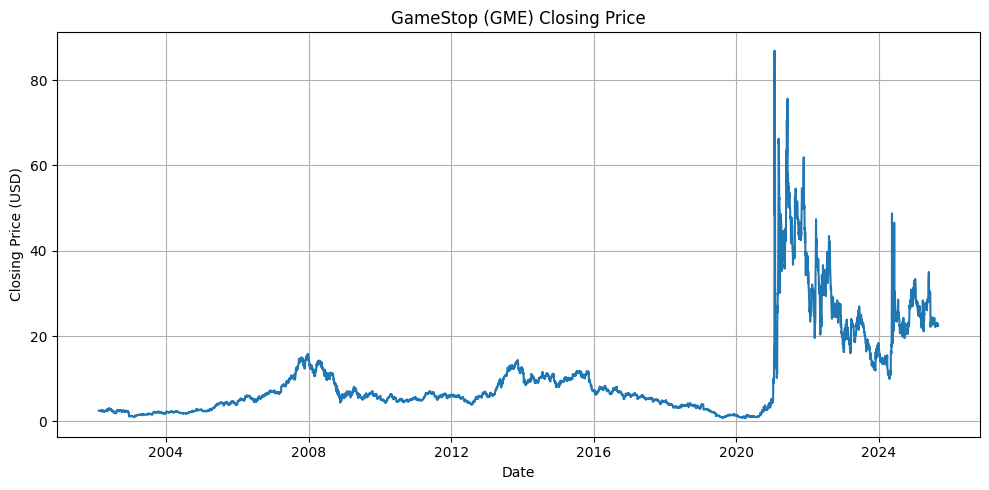

Done! Files saved: tesla_data.csv, tesla_revenue.csv, gme_data.csv, gme_revenue.csv, tesla_price.png, gme_price.png


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# ----------------------------------------
# Helper: consistent, simple plotting API
# ----------------------------------------
def make_graph(stock_data: pd.DataFrame, title: str, date_col: str = "Date", price_col: str = "Close", outfile: str | None = None):
    if date_col not in stock_data.columns or price_col not in stock_data.columns:
        raise ValueError(f"Columns '{date_col}' or '{price_col}' not found in dataframe.")
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data[date_col], stock_data[price_col])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid(True)
    if outfile:
        plt.tight_layout()
        plt.savefig(outfile, dpi=150)
    plt.show()

# ----------------------------------------
# Helper: robust revenue scraper (Macrotrends)
# ----------------------------------------
def scrape_macrotrends_revenue(ticker: str, company_slug: str) -> pd.DataFrame:
    url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company_slug}/revenue"
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                       "(KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"),
        "Accept-Language": "en-US,en;q=0.9",
    }

    resp = requests.get(url, headers=headers, timeout=30)
    resp.raise_for_status()
    html = resp.text

    soup = BeautifulSoup(html, "html.parser")
    table = soup.find("table", {"class": "historical_data_table table"})

    if table is not None:
        df = pd.read_html(str(table))[0]
    else:
        df = None
        for cand in pd.read_html(html):
            if cand.shape[1] == 2 and any("Revenue" in str(c) for c in cand.columns):
                df = cand
                break
        if df is None:
            raise RuntimeError(f"Could not locate the quarterly revenue table for {ticker} at {url}")

    df = df.copy()
    df.columns = ["Date", "Revenue"]
    df["Date"] = df["Date"].astype(str).str.strip()
    df["Revenue"] = (df["Revenue"].astype(str)
                     .str.replace("$", "", regex=False)
                     .str.replace(",", "", regex=False))
    df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

    df = df.dropna(subset=["Date", "Revenue"]).reset_index(drop=True)
    return df

# ==============================
# Question 1: TSLA stock (yfinance)
# ==============================
tesla_data = yf.download("TSLA", period="max", auto_adjust=False, progress=False)
tesla_data.reset_index(inplace=True)
tesla_data.to_csv("tesla_data.csv", index=False)
print("Q1) tesla_data.head():")
print(tesla_data.head())

# =============================================
# Question 2: Tesla revenue (web scraping robust)
# =============================================
tesla_revenue = scrape_macrotrends_revenue(ticker="TSLA", company_slug="tesla")
tesla_revenue.to_csv("tesla_revenue.csv", index=False)
print("Q2) tesla_revenue.tail():")
print(tesla_revenue.tail())

# ===============================
# Question 3: GME stock (yfinance)
# ===============================
gme_data = yf.download("GME", period="max", auto_adjust=False, progress=False)
gme_data.reset_index(inplace=True)
gme_data.to_csv("gme_data.csv", index=False)
print("Q3) gme_data.head():")
print(gme_data.head())

# ============================================
# Question 4: GME revenue (web scraping robust)
# ============================================
gme_revenue = scrape_macrotrends_revenue(ticker="GME", company_slug="gamestop")
gme_revenue.to_csv("gme_revenue.csv", index=False)
print("Q4) gme_revenue.tail():")
print(gme_revenue.tail())

# =================================
# Question 5: Plot Tesla Stock Graph
# =================================
print("Q5) Tesla closing price chart:")
make_graph(tesla_data, "Tesla (TSLA) Closing Price", outfile="tesla_price.png")

# ===================================
# Question 6: Plot GameStop Stock Graph
# ===================================
print("Q6) GameStop closing price chart:")
make_graph(gme_data, "GameStop (GME) Closing Price", outfile="gme_price.png")

print("Done! Files saved: tesla_data.csv, tesla_revenue.csv, gme_data.csv, gme_revenue.csv, tesla_price.png, gme_price.png")
